# The MNIST dataset

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

### Load MNIST data and visualize one of the sample images

In [2]:
# MNIST dataset can be automatically downloaded from within TensorFlow
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)    # labels are encoded as one-hot!

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


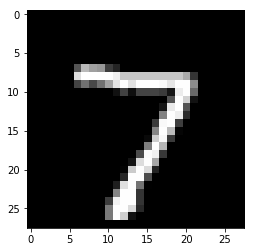

In [3]:
img = mnist.test.images[0]
# reshape array to 28x28 matrix to be able to print it as square image
plt.imshow(img.reshape([28,28]))
plt.gray()
plt.show()
#plt.savefig("mnist7.png", dpi=600, bbox_inches='tight')

## This time we use an interactive session
Interactive sessions are a neat feature when working in jupyter notebooks!

In [4]:
sess = tf.InteractiveSession()

### Create the TensorFlow graph

In [5]:
# Define placeholders for input data and labels (with arbitrary batch size)
x = tf.placeholder(tf.float32, shape=[None, 784])    # input as vector of size 28*28 = 784
y_ = tf.placeholder(tf.float32, shape=[None, 10])    # labels as numbers 0 - 9

In [6]:
# Define variables for the graph and initialize them
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Note that we can initialize the variables right away in an interactive session!
sess.run(tf.global_variables_initializer())

In [7]:
# Again use the simple linear regression model (with slightly more variables)
y = tf.matmul(x, W) + b

# Use softmax loss
softmax = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [8]:
learning_rate = 0.5
steps = 2000

optimization = tf.train.GradientDescentOptimizer(learning_rate).minimize(softmax)

In [9]:
# run optimization for the provided number of steps
for _ in range(steps):
    batch = mnist.train.next_batch(100)
    optimization.run(feed_dict={x: batch[0], y_: batch[1]})

In [10]:
# Define test data to be fed into graph
test_data = { x: mnist.test.images, y_: mnist.test.labels }

prediction = tf.argmax(y, 1)
label = tf.argmax(y_, 1)

# Calculate whether a prediction is correct or not
correct_prediction = tf.equal(prediction, label)
print correct_prediction.eval(feed_dict=test_data) # not that helpful ..

[ True  True  True ...,  True  True  True]


### The overall test accuracy should be about 92% for the Softmax classification.
Not bad, but we can do better!

In [11]:
# Determine fraction of correct predictions given the true label
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print accuracy.eval(feed_dict=test_data)

0.9193


### What does the output look like?

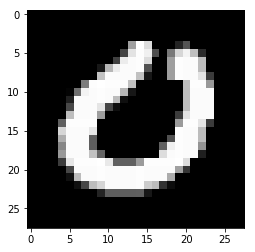

In [12]:
import random
img = random.choice(mnist.test.images)
plt.imshow(img.reshape([28,28]))
plt.gray()
plt.show()

In [13]:
probs = y.eval(feed_dict={x: [img]})
print(probs)
highest_value = np.argmax(probs)

[[ 16.8995018  -14.56276417   2.02439189  -3.25509143  -8.23006439
    9.49832153   3.69527483  -5.4311018    3.78418922  -4.42264795]]


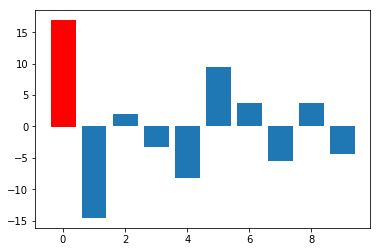

In [14]:
# Visualize the log-probabilities
bars = plt.bar(range(10), y.eval(feed_dict={x: [img] })[0])
bars[highest_value].set_color('r')
plt.show()